## Import Dependencies


In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

import io
import requests

### Obtain Training and Testing CSV

In [6]:
# Make sure to copy full file path of the CSV files

data= pd.read_csv(r'/Users/ericsun02/Documents/UCD Classes/23-24/Winter Q/141C/Final_Proj/Disease-Prediction/Training.csv')
# test = pd.read_csv(r'/Users/ericsun02/Documents/UCD Classes/23-24/Winter Q/141C/Final_Proj/Disease-Prediction/Testing.csv')

In [7]:
# Classes to Predict

len(data['prognosis'].unique())

41

### Check for NAs, Missing Data, Summaries

In [8]:
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [9]:
# Check for Null Values in Training Set
data.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

### Clean Data for Feature Selection

In [10]:
# Drop variables that have NAs and are correlated

data= data.drop(columns = ["Unnamed: 133",
                         'sinus_pressure', 'throat_irritation', 
                         'slurred_speech', 'palpitations', 'loss_of_smell', 
                         'stomach_bleeding', 'coma', 'redness_of_eyes', 
                         'runny_nose', 'congestion', 'receiving_unsterile_injections', 
                         'receiving_blood_transfusion', 'brittle_nails', 'swollen_extremeties', 
                         'enlarged_thyroid', 'slurred_speech', 'drying_and_tingling_lips', 'cold_hands_and_feets', 
                         'puffy_face_and_eyes', 'yellow_urine'])

In [11]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 114, dtype: int64

#### Shuffle Data

In [12]:
# Shuffling introduces randomness, which gives data greater general representative power

sdata = data.sample(frac = 1)

In [13]:
sdata

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3339,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
115,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
4755,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
4728,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Paralysis (brain hemorrhage)
210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
2821,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
2648,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis


### Feature Selection

In [14]:
X = sdata.drop(['prognosis'], axis = 1)
y = sdata['prognosis']

# Label Encode Response 

le = LabelEncoder()
y= le.fit_transform(y)

In [15]:
###
X.shape[0] == len(y)

True

### Cross Validation

In [27]:
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators = len(X.columns), random_state = 1)

cross_val_score(rf, X, y, cv = 5, scoring)

array([1., 1., 1., 1., 1.])

### Splitting Train and Test

In [28]:
from sklearn.model_selection import train_test_split
# Initial Split given the Training and Test CSV files. Now, want to implement aa 75/25 split, using the training data as the main data.

X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size = 0.25, random_state=1
)

# x_train = training.drop(['prognosis'], axis = 1)
# y_train = training['prognosis']
# x_test = test.drop(['prognosis'], axis = 1)
# y_test = test['prognosis']

In [24]:
print(X_train)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
1832        0          0                     0                    0   
3344        0          0                     0                    0   
3936        1          1                     1                    0   
2888        0          0                     0                    0   
3924        0          0                     0                    0   
...       ...        ...                   ...                  ...   
2895        0          0                     0                    0   
2763        1          1                     0                    0   
905         0          0                     0                    0   
3980        1          0                     0                    0   
235         0          0                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
1832          0       0           0             0        0         

In [25]:
# Second coordinate of X_train should match with X_test
print(X_train.shape)

(3690, 113)


In [24]:
print(X_test.shape)
print(y_test.shape)

NameError: name 'X_test' is not defined

### Random Forest Classifier

In [33]:
# From SKLEARN
from collections import OrderedDict

ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=1,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=2,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=3,
        ),
    ),
]

#### Metrics: OOB Error

In [34]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimat

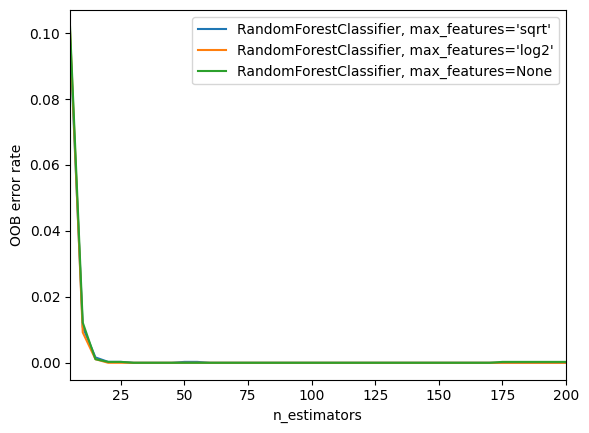

In [36]:
# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

#### Metrics: Classification Matrix

In [30]:
# 3 models for varying amount of predictors to split tree on

# m=p
rf = RandomForestClassifier(n_estimators = len(X_train.columns), random_state = 1)
rf.fit(X_train, y_train)

# m=p/2
rf2 = RandomForestClassifier(n_estimators = int(len(X_train.columns) / 2), random_state = 2)
rf2.fit(X_train, y_train)

# m=sqrt(p)
rf3 = RandomForestClassifier(n_estimators = int(round(np.sqrt(len(X_train.columns)), 0)), random_state = 3)
rf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=11, random_state=3)

In [38]:
# Use model to predict type of prognosis (Y) on unseen values of symptoms (X)

rf_predictions = rf.predict(X_test)
rf2_predictions = rf2.predict(X_test)
rf3_predictions = rf3.predict(X_test)

# Should be equal to x_test, x-coord
print(len(rf_predictions))
print(len(rf2_predictions))
print(len(rf3_predictions))

1230
1230
1230


### Feature Importance

Top 10 feature rankings:
1. muscle_pain: 0.02378445365584296
2. high_fever: 0.023196470595991038
3. yellowing_of_eyes: 0.019511252585740876
4. dark_urine: 0.01906148673820684
5. malaise: 0.017857897905309048
6. itching: 0.01754206505946959
7. nausea: 0.01630499909873267
8. vomiting: 0.016065409480474982
9. acute_liver_failure: 0.015595673026385088
10. chest_pain: 0.015249987924479796


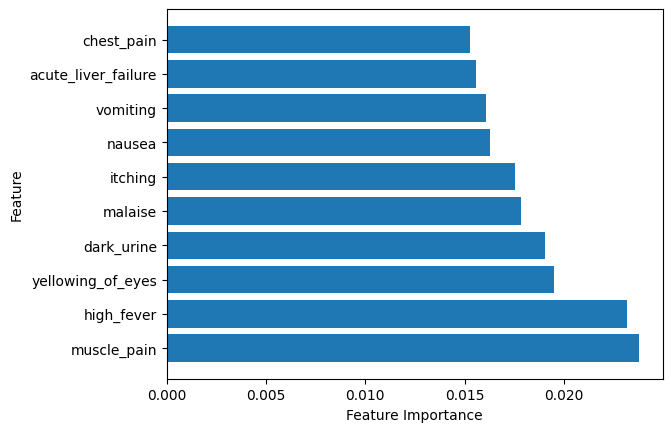

In [35]:
# Get feature importances from the trained model
importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Select the top 10 features
num_features = 10
top_indices = indices[:num_features]
top_importances = importances[top_indices]

# Print the top 10 feature rankings
print("Top 10 feature rankings:")
for f in range(num_features):  # Use num_features instead of 10
    print(f"{f+1}. {X_train.columns[indices[f]]}: {importances[indices[f]]}")
# Plot the top 10 feature importances in a horizontal bar chart
plt.barh(range(num_features), top_importances, align="center")
plt.yticks(range(num_features), X_train.columns[top_indices])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.show()


#### Classification Report Evaluation

In [39]:
from sklearn.metrics import classification_report

# For m = p
pd.DataFrame(classification_report(y_test, rf_predictions, output_dict=True)).T

,precision,recall,f1-score,support
0,1.0,1.0,1.0,35.0
1,1.0,1.0,1.0,26.0
2,1.0,1.0,1.0,30.0
3,1.0,1.0,1.0,26.0
4,1.0,1.0,1.0,35.0
5,1.0,1.0,1.0,31.0
6,1.0,1.0,1.0,26.0
7,1.0,1.0,1.0,31.0
8,1.0,1.0,1.0,29.0
9,1.0,1.0,1.0,27.0


In [40]:
# For m = p/2
pd.DataFrame(classification_report(y_test, rf2_predictions, output_dict=True)).T

,precision,recall,f1-score,support
0,1.0,1.0,1.0,35.0
1,1.0,1.0,1.0,26.0
2,1.0,1.0,1.0,30.0
3,1.0,1.0,1.0,26.0
4,1.0,1.0,1.0,35.0
5,1.0,1.0,1.0,31.0
6,1.0,1.0,1.0,26.0
7,1.0,1.0,1.0,31.0
8,1.0,1.0,1.0,29.0
9,1.0,1.0,1.0,27.0


In [41]:
# For m = sqrt(p)
pd.DataFrame(classification_report(y_test, rf3_predictions, output_dict=True)).T

,precision,recall,f1-score,support
0,1.0,1.0,1.0,35.0
1,1.0,1.0,1.0,26.0
2,1.0,1.0,1.0,30.0
3,1.0,1.0,1.0,26.0
4,1.0,1.0,1.0,35.0
5,1.0,1.0,1.0,31.0
6,1.0,1.0,1.0,26.0
7,1.0,1.0,1.0,31.0
8,1.0,1.0,1.0,29.0
9,1.0,1.0,1.0,27.0
